### Sarcasm Detector

- Data Collection
  - Import wanted libraries
  - Import a Kaggle DataSet based on Text Form (example would be --> https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection)
  - Use Pandas To Turn it into DataFrame
  - Explore DataSet and the Data it contains

In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [433]:
! mkdir data

mkdir: data: File exists


In [2]:
dataFrame = pd.read_json("../Sarcasm-Detector/data/Sarcasm_Headlines_Dataset.json", lines=True)
dataFrame.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

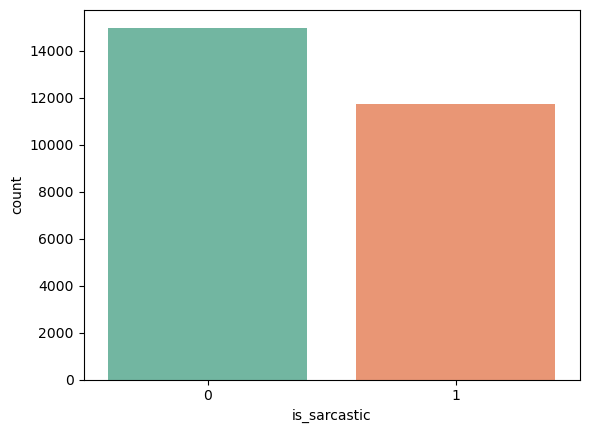

In [3]:
sns.countplot(dataFrame.is_sarcastic , palette='Set2')

In [4]:
dataFrame['headline_split'] = dataFrame.headline.apply(lambda x: len(x.split()))

In [5]:
sarcastic_data_frame= dataFrame[dataFrame["is_sarcastic"] == 1]
serious_sarcastic_data_frame= dataFrame[dataFrame["is_sarcastic"] == 0]

/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


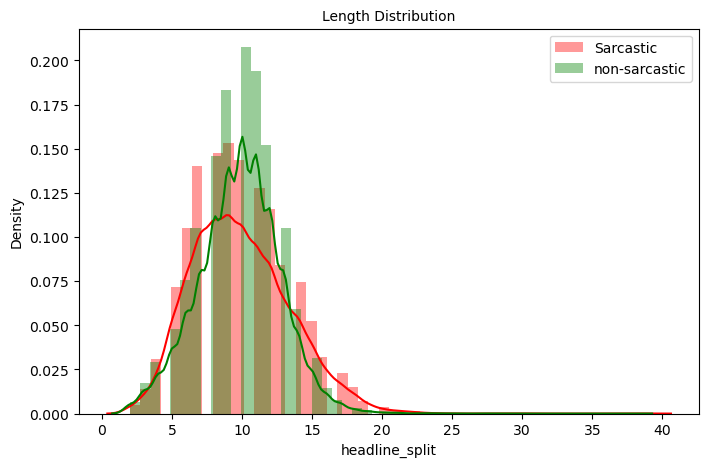

In [6]:
dataFrame["headline_split"] = dataFrame.headline.apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.distplot(sarcastic_data_frame.headline_split, hist= True, label= 'Sarcastic' , color = "red")
sns.distplot(serious_sarcastic_data_frame.headline_split, hist= True, label= 'non-sarcastic' , color = "green")
plt.legend()
plt.title('Length Distribution', fontsize = 10)
plt.show()

#### Cleaning the Data

In [7]:
headline_array = np.array(dataFrame.headline)

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [9]:
stop_words = stopwords.words('english')
punctuation = string.punctuation
lemmatizer = WordNetLemmatizer()

##### Test of Preprocess a specific text

In [10]:
word_test = word_tokenize(headline_array[0])
word_test = [w.lower() for w in word_test]
words = [lemmatizer.lemmatize(word, "v") for word in word_test]
words

['former',
 'versace',
 'store',
 'clerk',
 'sue',
 'over',
 'secret',
 "'black",
 'code',
 "'",
 'for',
 'minority',
 'shoppers']

##### PreProcess Text

- lower case of all texts
- remove newline characters
- lemmetize 

In [11]:
def preprocess_text(df, column, new_column):
  """
  Preprocesses texts from a pandas dataFrame into a new column
  """
  # Tokenize the sentences
  df[new_column] = df[column].apply(lambda x: x.lower())
  df[new_column].apply(lambda x: re.sub("\\n", "" , x))
  df[new_column].apply(lambda x: word_tokenize(x))
  # # Remove stop words
  df[new_column].apply(lambda x: [lemmatizer.lemmatize(word, pos="v") for word in x])
  df[new_column].apply(lambda x: [word for word in x if word not in stop_words])
  df[new_column].apply(lambda x: [word for word in x if word not in punctuation])
  # # Join the sentences back together
  df[new_column].apply(lambda x: " ".join(x))
  return df


In [12]:
def preprocess_sentence(sentence):
  """
  Preprocesses texts of any sentence by cleaning the text
  """
  sentence = sentence.lower()
  # sentence = re.sub("count=\\n", "", sentence)
  sentence = word_tokenize(sentence)
  sentence = [lemmatizer.lemmatize(word , pos="v") for word in sentence]
  sentence = [word for word in sentence if word not in stop_words]
  sentence = [word for word in sentence if word not in punctuation]
  sentence = " ".join(sentence)
  return sentence

In [13]:
preprocess_sentence("I’m not saying I hate you, what I’m saying is that you are literally the Monday of my life")

'’ say hate ’ say literally monday life'

In [14]:
def preprocessed_headline_split(df , column , new_column):
  df[new_column] = df[column].apply(lambda x: len(x.split()))
  return df

In [15]:
data_adjusted = preprocess_text(dataFrame, 'headline', "new_headline")
data_preprocessed = preprocessed_headline_split(data_adjusted, "new_headline", 'new_headline_split')

In [16]:
data_preprocessed

,article_link,headline,is_sarcastic,headline_split,new_headline,new_headline_split
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,12,former versace store clerk sues over secret 'b...,12
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,14,the 'roseanne' revival catches up to our thorn...,14
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,14,mom starting to fear son's web series closest ...,14
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,13,"boehner just wants wife to listen, not come up...",13
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,11,j.k. rowling wishes snape happy birthday in th...,11
...,...,...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,5,american politics in moral free-fall,5
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,4,america's best 20 hikes,4
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,3,reparations and obama,3
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,8,israeli ban targeting boycott supporters raise...,8


#### Get Number of Unique Words in preprocessed texts

- To Determine the total number of unique words throughout the entire dataset

In [17]:
joined_sentences = " ".join(data_preprocessed["new_headline"])
word_list = joined_sentences.split()
unique_words = set(word_list)
total_unique_words = len(unique_words)
total_unique_words

36599

##### Check Average

This is just to check the average number of words after preprocessing our data in the dataset for both serious and sarcastic

In [18]:
data_preprocessed.groupby(['is_sarcastic']).new_headline_split.mean()

is_sarcastic
0    9.815616
1    9.884425
Name: new_headline_split, dtype: float64

##### Get Largest

This is just to check the number of words in our biggest sentence based on what the sentence is labelled as

In [19]:
data_preprocessed.groupby(['is_sarcastic']).new_headline_split.max()

is_sarcastic
0    38
1    39
Name: new_headline_split, dtype: int64

#### Splitting the Data

- Split Data into 3 ways training validation and testing of 75%/12.5%/12.5%

In [20]:
def get_dataset_partitions_pd(df, train_split=0.75, val_split=0.125, test_split=0.125):
  # assert the sum of all the data split = 1
  assert(train_split + val_split + test_split) == 1
  # assert for equal splitting for both validation and testing
  assert(val_split == test_split)

  #Split the Data
  df_sample = df.sample(frac = 1 , random_state = 42)
  
  train_df = df_sample.sample(frac = train_split, random_state = 42)
  val_df = df_sample.sample(frac = val_split, random_state = 42)
  test_df = df_sample.sample(frac = test_split, random_state = 42)
  # return train, val, test dataframes
  return train_df, val_df, test_df

In [21]:
train_ds , val_ds , test_ds  = get_dataset_partitions_pd(data_preprocessed) 

In [22]:
test_ds.iloc[1].headline

"who's that woman dressed like bowie at the oscars? introducing, sandy powell."

In [23]:
val_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    1849
1    1490
Name: new_headline_split, dtype: int64

In [24]:
test_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    1849
1    1490
Name: new_headline_split, dtype: int64

In [25]:
train_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    11225
1     8807
Name: new_headline_split, dtype: int64

#### Convert Text into series of Tokens

- More of hypertuning the text before training our models

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau 

2023-06-07 16:55:08.787263: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
max_words = total_unique_words
oov_token = '<00V>'
batch_size = 64

In [28]:
tokenizer = Tokenizer(num_words=max_words , oov_token= oov_token)
tokenizer.fit_on_texts(train_ds.new_headline)
word_index = tokenizer.word_index

##### Hypertune the 3 datasets

In [29]:
def convert_text_to_values_from_column(ds , column , max_length = 100, padding_type = "post" , trunc_type = "post"):
  """
  converts texts into a sequence of numbers
  """
  sequences = tokenizer.texts_to_sequences(ds[column])
  sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return sequences

In [30]:
def convert_text_to_values(sentence, max_length = 100, padding_type = "post" , trunc_type = "post"):
  """
  converts texts into a sequence of numbers
  """
  sequences = tokenizer.texts_to_sequences(sentence)
  sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return sequences

In [31]:
train_sequences = convert_text_to_values_from_column(train_ds , "new_headline")
val_sequences = convert_text_to_values_from_column(val_ds , "new_headline")
test_sequences = convert_text_to_values_from_column(test_ds , "new_headline")

In [32]:
train_sequences

array([[ 5672,   567,  4836, ...,     0,     0,     0],
       [ 1152,    28,    56, ...,     0,     0,     0],
       [ 5676,  6923,  2278, ...,     0,     0,     0],
       ...,
       [   95,  1979,  4454, ...,     0,     0,     0],
       [25640,     3,  8694, ...,     0,     0,     0],
       [  889,  1056,   993, ...,     0,     0,     0]], dtype=int32)

In [33]:
val_sequences

array([[ 5672,   567,  4836, ...,     0,     0,     0],
       [ 1152,    28,    56, ...,     0,     0,     0],
       [ 5676,  6923,  2278, ...,     0,     0,     0],
       ...,
       [14930, 14931,  2240, ...,     0,     0,     0],
       [ 1880,  7070,  1558, ...,     0,     0,     0],
       [14932, 14933,  1443, ...,     0,     0,     0]], dtype=int32)

In [34]:
test_sequences

array([[ 5672,   567,  4836, ...,     0,     0,     0],
       [ 1152,    28,    56, ...,     0,     0,     0],
       [ 5676,  6923,  2278, ...,     0,     0,     0],
       ...,
       [14930, 14931,  2240, ...,     0,     0,     0],
       [ 1880,  7070,  1558, ...,     0,     0,     0],
       [14932, 14933,  1443, ...,     0,     0,     0]], dtype=int32)

#### Build a series of Models

##### First Experimental Model, Bidirectional Embedding LSTM model

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 
import tensorflow as tf

In [39]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_words+ 1, batch_size , input_length=100),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

2023-06-07 16:58:15.366412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 16:58:15.367706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 16:58:15.368704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           2342400   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,416,769
Trainable params: 2,416,769
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_sequences, train_ds.is_sarcastic, batch_size=32, epochs=6, 
                    validation_data=(val_sequences, val_ds.is_sarcastic), 
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/6


2023-06-07 16:58:18.580426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 16:58:18.581881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 16:58:18.583055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

626/626 [==============================] - ETA: 0s - loss: 0.3864 - accuracy: 0.8140

2023-06-07 16:58:54.417907: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 16:58:54.418903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 16:58:54.419995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

626/626 [==============================] - 37s 56ms/step - loss: 0.3864 - accuracy: 0.8140 - val_loss: 0.1530 - val_accuracy: 0.9527 - lr: 0.0010
Epoch 2/6
626/626 [==============================] - 34s 55ms/step - loss: 0.1419 - accuracy: 0.9464 - val_loss: 0.0476 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 3/6
626/626 [==============================] - 34s 54ms/step - loss: 0.0506 - accuracy: 0.9836 - val_loss: 0.0166 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 4/6
626/626 [==============================] - 33s 53ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0088 - val_accuracy: 0.9970 - lr: 0.0010
Epoch 5/6
626/626 [==============================] - 33s 53ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0043 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 6/6
626/626 [==============================] - 34s 54ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0056 - val_accuracy: 0.9979 - lr: 0.0010


105/105 [==============================] - 1s 9ms/step - loss: 0.0056 - accuracy: 0.9979
Test Loss:  0.005575941409915686
Test Accuracy 0.99790358543396
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


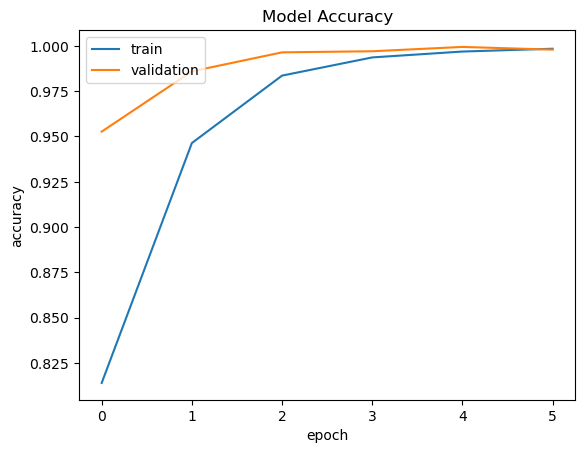

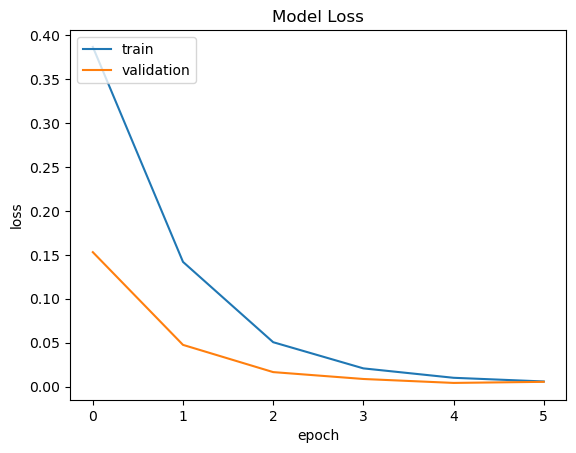

In [41]:
score = model.evaluate(test_sequences, test_ds.is_sarcastic)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Based on the graphs, it seems that the number of epochs would be most suitable when its approximately equal to 6

In [42]:
prediction_model_bidir_large_unit = model.predict(test_sequences)

2023-06-07 17:01:56.458472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 17:01:56.459777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 17:01:56.460696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

105/105 [==============================] - 1s 9ms/step


#### Bidirectional Embedding with LSTM with number of units divided by Half

In [43]:
# Model 2
model_bidir_smaller_units = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_words, batch_size,input_length = 100),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 32, return_sequences = True)),  
  tf.keras.layers.GlobalMaxPool1D(),
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
model_bidir_smaller_units.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_bidir_smaller_units.summary()

2023-06-07 17:02:06.804402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 17:02:06.805798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 17:02:06.806893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           2342336   
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 64)          24832     
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [44]:
history_bidir = model_bidir_smaller_units.fit(train_sequences, train_ds.is_sarcastic, batch_size=32, epochs=6 , 
                    validation_data=(val_sequences, val_ds.is_sarcastic),
                    callbacks=[rlrp] ,verbose=1)

Epoch 1/6


2023-06-07 17:02:09.617997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 17:02:09.619515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 17:02:09.620956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

626/626 [==============================] - ETA: 0s - loss: 0.4296 - accuracy: 0.7921

2023-06-07 17:02:41.316492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 17:02:41.317531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 17:02:41.318753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

626/626 [==============================] - 33s 48ms/step - loss: 0.4296 - accuracy: 0.7921 - val_loss: 0.1895 - val_accuracy: 0.9383 - lr: 0.0010
Epoch 2/6
626/626 [==============================] - 29s 46ms/step - loss: 0.1867 - accuracy: 0.9280 - val_loss: 0.0795 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 3/6
626/626 [==============================] - 29s 46ms/step - loss: 0.0781 - accuracy: 0.9751 - val_loss: 0.0261 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 4/6
626/626 [==============================] - 29s 46ms/step - loss: 0.0336 - accuracy: 0.9902 - val_loss: 0.0109 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 5/6
626/626 [==============================] - 29s 46ms/step - loss: 0.0177 - accuracy: 0.9953 - val_loss: 0.0062 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 6/6
626/626 [==============================] - 28s 45ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0028 - val_accuracy: 0.9994 - lr: 0.0010


105/105 [==============================] - 1s 7ms/step - loss: 0.0028 - accuracy: 0.9994
Test Loss:  0.002766164718195796
Test Accuracy 0.9994010329246521
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


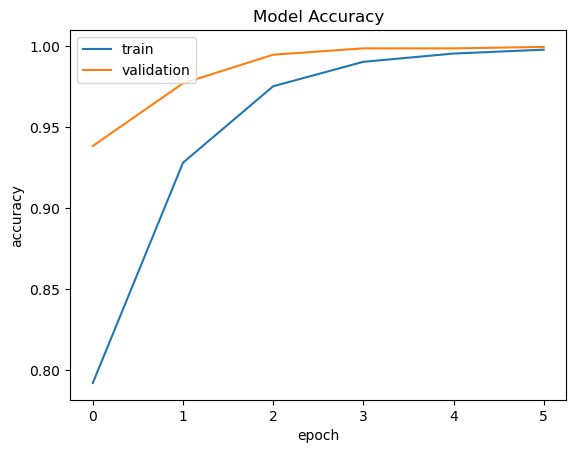

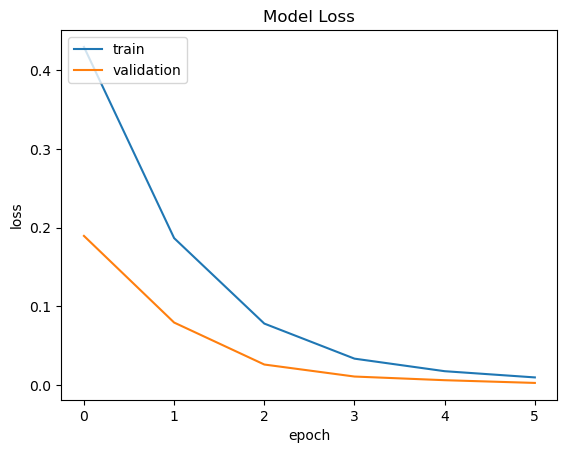

In [45]:
score = model_bidir_smaller_units.evaluate(test_sequences, test_ds.is_sarcastic)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history_bidir.history.keys())
# summarize history for accuracy
plt.plot(history_bidir.history['accuracy'])
plt.plot(history_bidir.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bidir.history['loss'])
plt.plot(history_bidir.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
prediction_model_bidir_smaller_unit = model_bidir_smaller_units.predict(test_sequences)
prediction_model_bidir_smaller_unit

105/105 [==============================] - 1s 12ms/step


array([[9.9995106e-01],
       [3.7052408e-03],
       [9.9983460e-01],
       ...,
       [9.9706531e-01],
       [9.9922049e-01],
       [2.2379390e-07]], dtype=float32)

In [68]:
sentence = "what do you smoke, elephant trunks?"
sentence = preprocess_sentence(sentence)
print(sentence)
sentence_sequence = convert_text_to_values(sentence)
print(sentence_sequence)
prediction = model_bidir_smaller_units.predict([sentence_sequence])
prediction


smoke elephant trunks
[[  51    0    0 ...    0    0    0]
 [1137    0    0 ...    0    0    0]
 [3747    0    0 ...    0    0    0]
 ...
 [1785    0    0 ...    0    0    0]
 [ 631    0    0 ...    0    0    0]
 [  51    0    0 ...    0    0    0]]
1/1 [==============================] - 0s 34ms/step


array([[0.19365026],
       [0.7125351 ],
       [0.09702851],
       [0.03643741],
       [0.8559605 ],
       [0.12198193],
       [0.8559605 ],
       [0.68260634],
       [0.8559605 ],
       [0.49709854],
       [0.06954248],
       [0.00588989],
       [0.06478503],
       [0.185078  ],
       [0.12198193],
       [0.185078  ],
       [0.6390795 ],
       [0.38051116],
       [0.06478502],
       [0.03643744],
       [0.19365026]], dtype=float32)

In [69]:
prediction = np.squeeze(prediction)
average_prediction = np.mean(prediction)
threshold = 0.5
if average_prediction > 0.5:
    print("Sentence is sarcastic")
else:
    print("Sentence is not sarcastiic")

Sentence is not sarcastiic


### Based on the 2 models built so far, the Most optimum was the Bidirectional LSTM model with smaller number of units which is approximately equal to 32 units